In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def founderShareValue(pShare, dLockup, pSuccess, dDilution):
    return pShare * (1 - dLockup) * pSuccess * (1 - dDilution)

In [4]:
pShare = 10.0
dLockup = np.random.uniform(0.250, 0.275)
pSuccessProbability = np.random.uniform(0.75, 0.80)
pSuccess = np.random.binomial(n = 1, p = pSuccessProbability)
dDilution = np.random.uniform(0.00, 0.10)

print("Example (I assume that corresponding parameters are uniformly distributed):\n")
print(f"P_share: {pShare}")
print(f"D_lockup: {dLockup:.6f}")
print(f"P_success probability: {pSuccessProbability:.6f}")
print(f"P_success: {pSuccess}")
print(f"D_dilution: {dDilution:.6f}\n")
print(f"Founder Share Value: {founderShareValue(pShare, dLockup, pSuccess, dDilution):.6f}")

Example (I assume that corresponding parameters are uniformly distributed):

P_share: 10.0
D_lockup: 0.258654
P_success probability: 0.788471
P_success: 0
D_dilution: 0.013200

Founder Share Value: 0.000000


In [5]:
def monteCarlo(dLockupDistributionRangePct, pSuccessDistributionRangePct, dDilutionDistributionRangePct, numberOfSimulations):
    
    dLockupLow, dLockupHigh = np.array(dLockupDistributionRangePct) / 100
    pSuccessProbabilityLow, pSuccessProbabilityHigh = np.array(pSuccessDistributionRangePct) / 100
    dDilutionLow, dDilutionHigh = np.array(dDilutionDistributionRangePct) / 100

    pShare = 10.0
    dLockup = np.random.uniform(dLockupLow, dLockupHigh, numberOfSimulations)
    pSuccessProbability = np.random.uniform(pSuccessProbabilityLow, pSuccessProbabilityHigh, numberOfSimulations)
    pSuccess = np.random.binomial(n=1, p=pSuccessProbability)
    dDilution = np.random.uniform(dDilutionLow, dDilutionHigh, numberOfSimulations)

    founderValue = founderShareValue(pShare, dLockup, pSuccess, dDilution)

    simulationResults = pd.DataFrame({
        'pShare': pShare,
        'dLockup': dLockup,
        'pSuccessProbability': pSuccessProbability,
        'pSuccess': pSuccess,
        'dDilution': dDilution,
        'founderShareValue': founderValue
    })

    return simulationResults


In [6]:
# Set simulation parameters here

simulationData = monteCarlo(
    dLockupDistributionRangePct = [25.0, 27.5],
    pSuccessDistributionRangePct = [75.0, 80.0],
    dDilutionDistributionRangePct = [0.0, 10.0],
    numberOfSimulations = 200000
)

In [7]:
simulationData.head()

,pShare,dLockup,pSuccessProbability,pSuccess,dDilution,founderShareValue
0,10.0,0.266373,0.798338,1,0.015858,7.219930
1,10.0,0.272477,0.768349,1,0.030488,7.053423
2,10.0,0.251232,0.750010,1,0.012354,7.395178
3,10.0,0.263063,0.754157,0,0.072639,0.000000
4,10.0,0.256869,0.774155,1,0.058574,6.996031


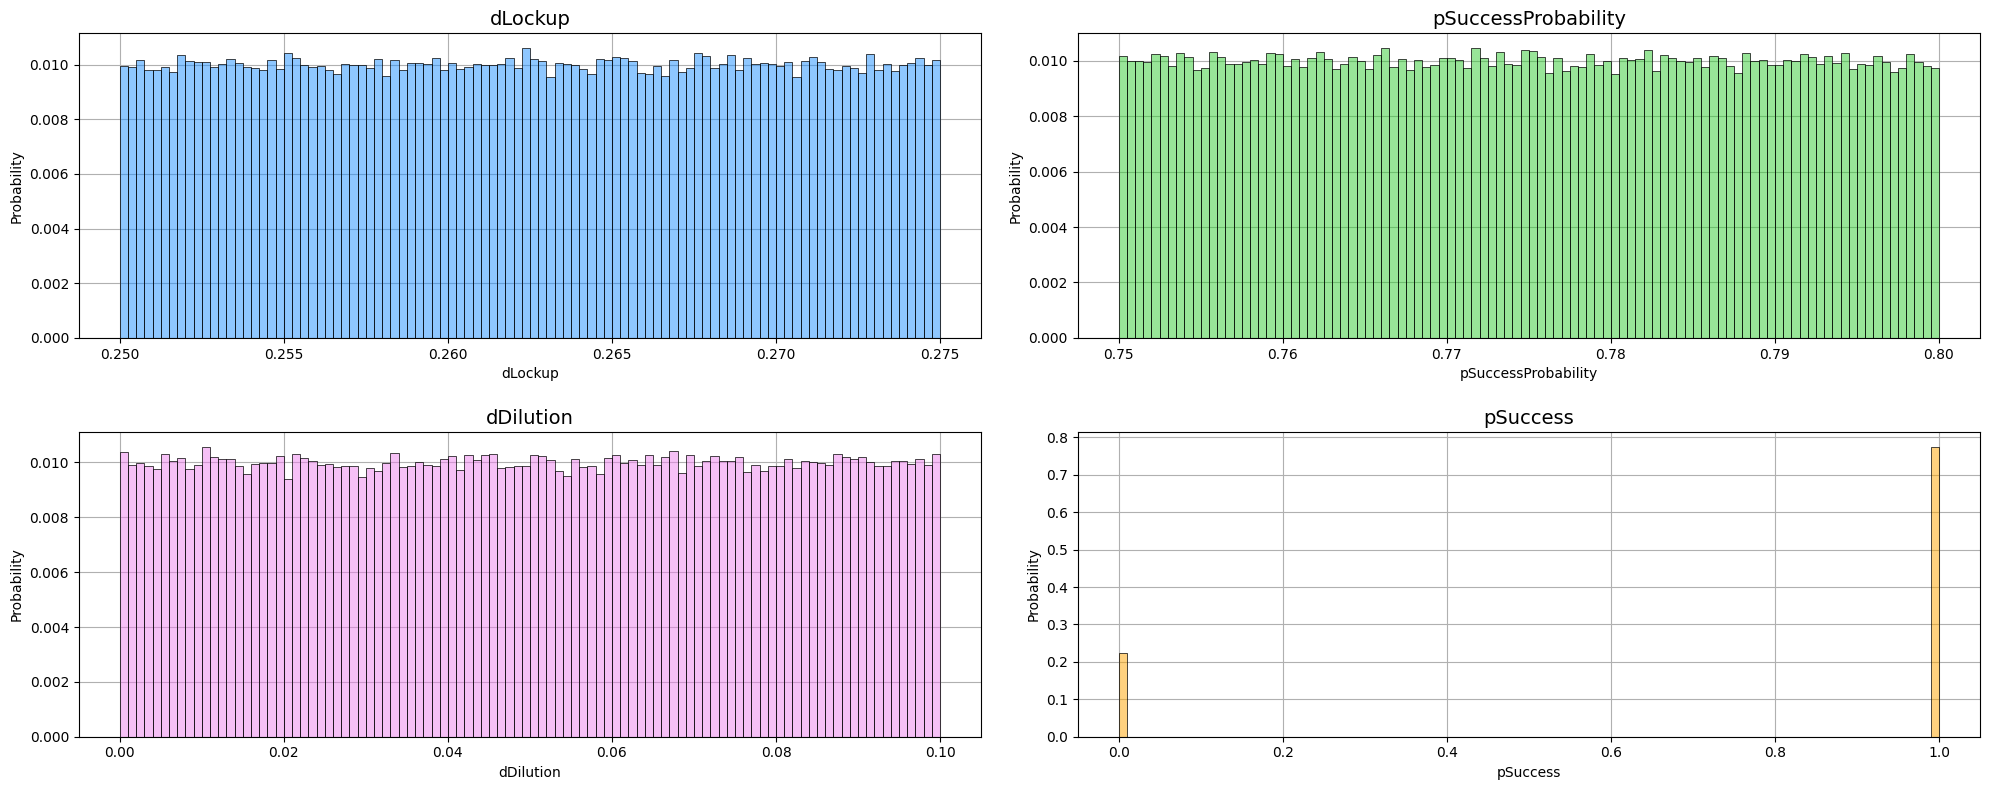

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 8))
cols = ['dLockup', 'pSuccessProbability', 'dDilution', 'pSuccess']

for ax, col, color in zip(axes.ravel(), cols, ['dodgerblue', 'limegreen', 'violet', 'orange']):
    sns.histplot(
        data = simulationData,
        x = col,
        bins = 100,
        kde = False,
        color = color,
        edgecolor = 'black',
        linewidth = 0.5,
        alpha = 0.5,
        ax = ax,
        zorder = 2,
        stat = "probability"
    )
    ax.set_title(f'{col}', fontsize = 14)
    ax.grid(True)

plt.tight_layout(h_pad = 2, w_pad = 2)
plt.show()

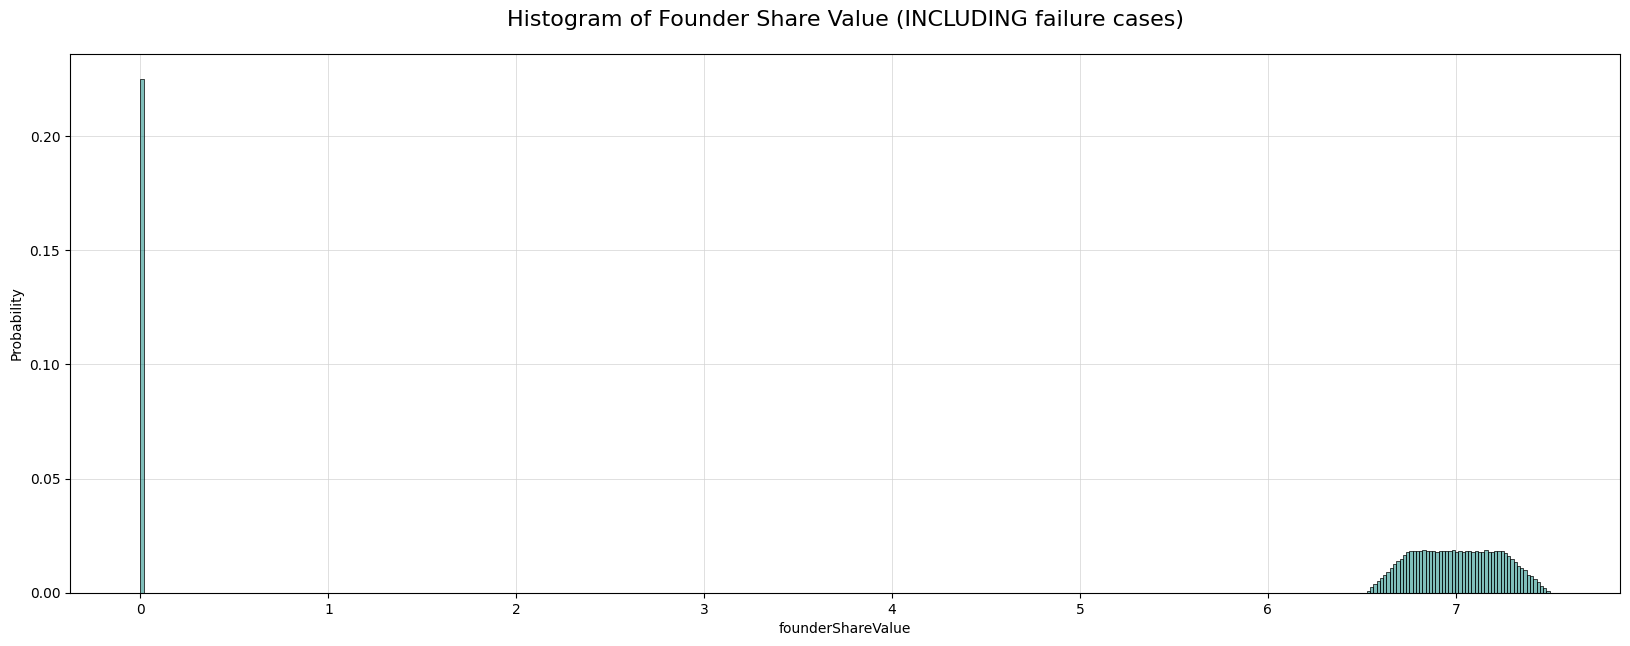

In [9]:
plt.figure(figsize = (20, 7))
sns.histplot(simulationData['founderShareValue'], bins='auto', color = "#007E76", alpha = 0.5, zorder = 2, linewidth = 0.5, stat = 'probability')
plt.title("Histogram of Founder Share Value (INCLUDING failure cases)", fontsize = 16, pad = 20)
plt.grid(color = "lightgray", linewidth = 0.5)
plt.show()

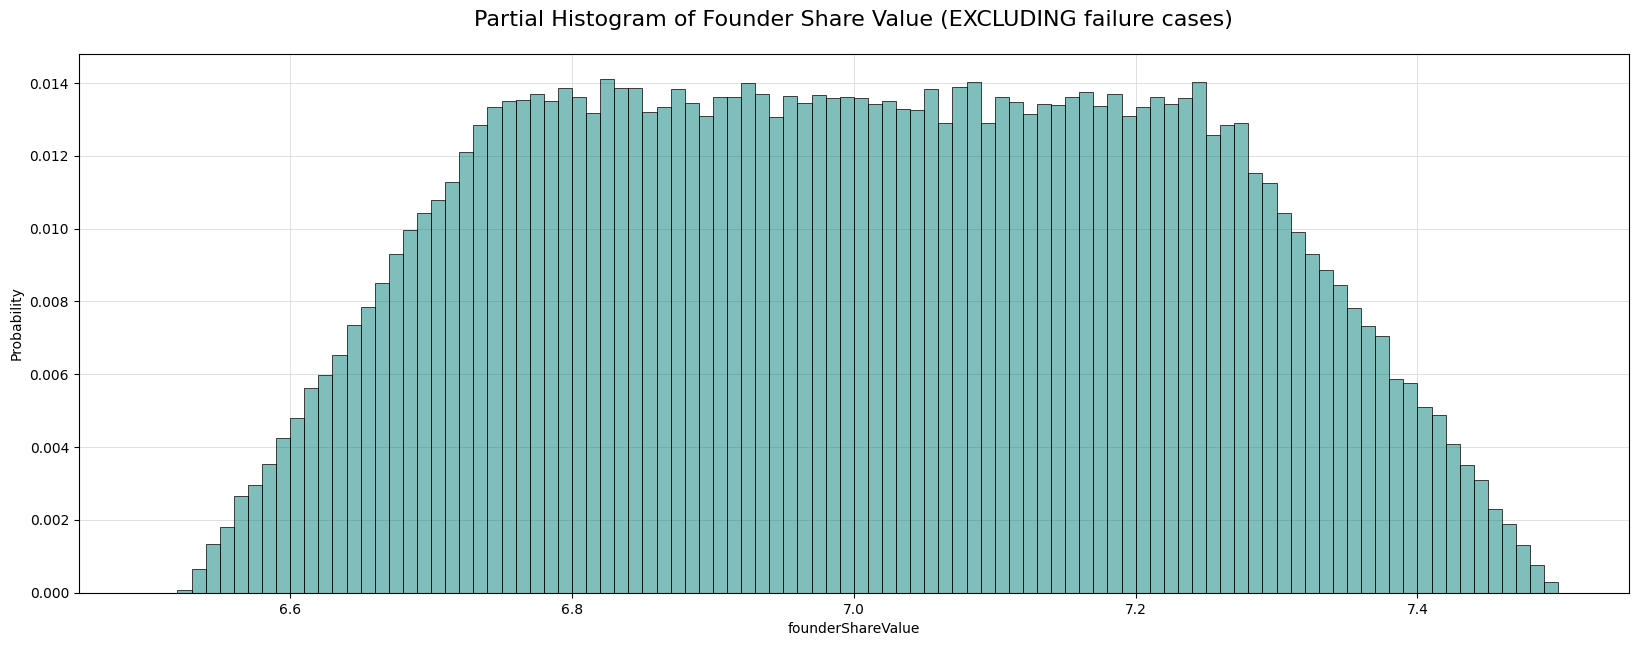

In [10]:
plt.figure(figsize = (20, 7))
sns.histplot(simulationData['founderShareValue'], bins = 100, color = "#007E76", alpha = 0.5, zorder = 2, linewidth = 0.5, binrange=[6.5, 7.5], stat = 'probability')
plt.title("Partial Histogram of Founder Share Value (EXCLUDING failure cases)", fontsize = 16, pad = 20)
plt.grid(color = "lightgray", linewidth = 0.5)
plt.show()

In [11]:
print("Some stats for Founder Share Value:\n")
print(f"Mean: {simulationData['founderShareValue'].mean():.6f}")
print(f"Median: {simulationData['founderShareValue'].median():.6f}")
# print(f"Standard Deviation: {simulationData['founderShareValue'].std():.6f}")
# print(f"95% Confidence Interval: [{simulationData['founderShareValue'].quantile(0.025):.6f}, {simulationData['founderShareValue'].quantile(0.975):.6f}]")
# print(f"99% Confidence Interval: [{simulationData['founderShareValue'].quantile(0.005):.6f}, {simulationData['founderShareValue'].quantile(0.995):.6f}]")

Some stats for Founder Share Value:

Mean: 5.430734
Median: 6.897977
